In [ ]:
# Function to decode operation

In [2]:
%pylab inline 

import mne
from mne.datasets import spm_face
from mne.decoding import GeneralizationAcrossTime
import sys
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
from scipy import stats
#Add personal functions to python path
sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding/')
#sys.path.append('/Volumes/NeuroSpin2T/Calculation_Pedro_2014/scripts/decoding/')
from fldtrp2mne import fldtrp2mne
from calc_twoClassClassify import calc_twoClassClassify
from sklearn import svm
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import StratifiedKFold

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Directories
#data_path = '/Volumes/NeuroSpin2T/Calculation_Pedro_2014/data/mat/'
#result_path = '/Volumes/NeuroSpin2T/Calculation_Pedro_2014/data/decoding/'

data_path = '/neurospin/meg/meg_tmp/Calculation_Pedro_2014/data/mat/'
result_path = '/neurospin/meg/meg_tmp/Calculation_Pedro_2014/data/decoding/'

In [4]:
# Load epochs times
epochs_times = np.load(result_path + 'epochs_times.npy')

scores_op1 = np.load(result_path + 'Classification_ 3_vs_4_vs_5_vs_6_Trainset_all_Testset_all.npy')
group_scores_op1 = np.mean(scores_op1, 0)
sem_group_scores_op1 = stats.sem(scores_op1, 0)
diag_op1 = group_scores_op1.diagonal()
diag_op1_sem = sem_group_scores_op1.diagonal()

scores_op2 = np.load(result_path + 'Classification_all 0_vs_1_vs_2_vs_3_Trainset_all_Testset_all.npy')
group_scores_op2 = np.mean(scores_op2, 0)
diag_op2 = group_scores_op2.diagonal()
sem_group_scores_op2 = stats.sem(scores_op2, 0)
diag_op2_sem = sem_group_scores_op2.diagonal()

scores_preRes = np.load(result_path + 'Classification_presented_result_2try 3_vs_4_vs_5_vs_6_Trainset_all_Testset_all.npy')
group_scores_preRes = np.mean(scores_preRes, 0)
diag_preRes = group_scores_preRes.diagonal()
sem_group_scores_preRes = stats.sem(scores_preRes, 0)
diag_preRes_sem = sem_group_scores_preRes.diagonal()

scores_addsub = np.load(result_path + 'Classification_ addition_vs_subtraction_Trainset_all_Testset_all.npy')
group_scores_addsub = np.mean(scores_addsub, 0)
diag_addsub = group_scores_addsub.diagonal()
sem_group_scores_addsub = stats.sem(scores_addsub, 0)
diag_addsub_sem = sem_group_scores_addsub.diagonal()

scores_corInc = np.load(result_path + 'Classification_ correct_vs_incorrect_Trainset_all_Testset_all.npy')
group_scores_corInc = np.mean(scores_corInc, 0)
diag_corInc = group_scores_corInc.diagonal()
sem_group_scores_corInc = stats.sem(scores_corInc, 0)
diag_corInc_sem = sem_group_scores_corInc.diagonal()

scores_corRes = np.load(result_path + 'Classification_correct_result_2try 3_vs_4_vs_5_vs_6_Trainset_all_Testset_all.npy')
group_scores_corRes = np.mean(scores_corRes, 0)
diag_corRes = group_scores_corRes.diagonal()
sem_group_scores_corRes = stats.sem(scores_corRes, 0)
diag_corRes_sem = sem_group_scores_corRes.diagonal()

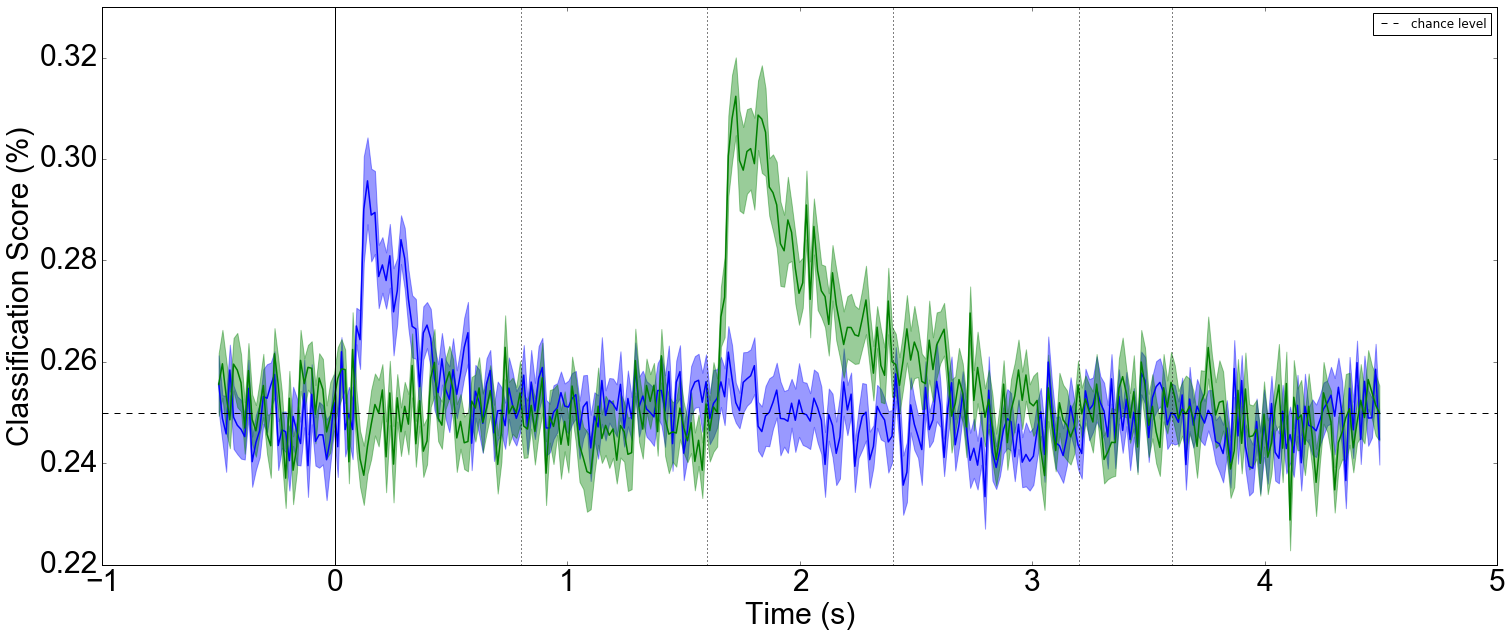

In [116]:
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)

sem_limits_op1 = (diag_op1 - diag_op1_sem, diag_op1 + diag_op1_sem)
sem_limits_op2 = (diag_op2 - diag_op2_sem, diag_op2 + diag_op2_sem)


plt.plot(epochs_times,diag_op1,epochs_times,diag_op2, linewidth=1.5)


plt.fill_between(epochs_times, sem_limits_op1[0], sem_limits_op1[1], color='b', alpha=0.4)
plt.fill_between(epochs_times, sem_limits_op2[0], sem_limits_op2[1], color='g', alpha=0.4)


#axes.set_xlim([xmin,xmax])
axes = plt.gca()
axes.set_ylim([.22,.33])

# Font
axis_font = {'fontname':'Arial', 'size':'30'}
title_font = {'fontname':'Arial', 'size':'32'}

plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset

plt.axhline(0.25, color = 'k', ls = '--', label = "chance level") #mark chance level
plt.legend(loc = 'upper right')

plt.xlabel('Time (s)', **axis_font)
plt.ylabel('Classification Score (%)', **axis_font)
#plt.title('Decoding operand_1 and operand_2', **title_font)

rcParams['figure.figsize'] = 25,10

plt.show()

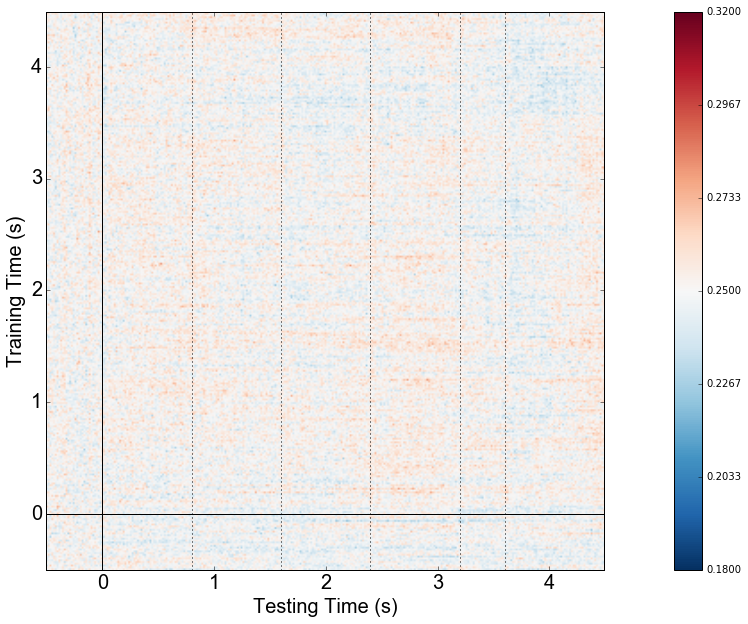

In [11]:
# Plot GAT
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(20)
    
imgplot = plt.imshow(group_scores_preRes, vmin=0.18, vmax=0.32, origin = 'lower', extent = [epochs_times[0], epochs_times[len(epochs_times)-1], 
                                                     epochs_times[0], epochs_times[len(epochs_times)-1]]) #flip the matrix around
imgplot.set_cmap('RdBu_r')

# Font
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'18'}


plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset
plt.axhline(0, color = 'k') #mark stimulus onset


#plt.colorbar()
plt.xlabel('Testing Time (s)', **axis_font)
plt.ylabel('Training Time (s)', **axis_font)
#plt.title('Decoding Generalization across time', **title_font)

rcParams['figure.figsize'] = 10,10

v = np.linspace(0.18, .32, 7, endpoint=True)
x = plt.colorbar(ticks=v)
#print x

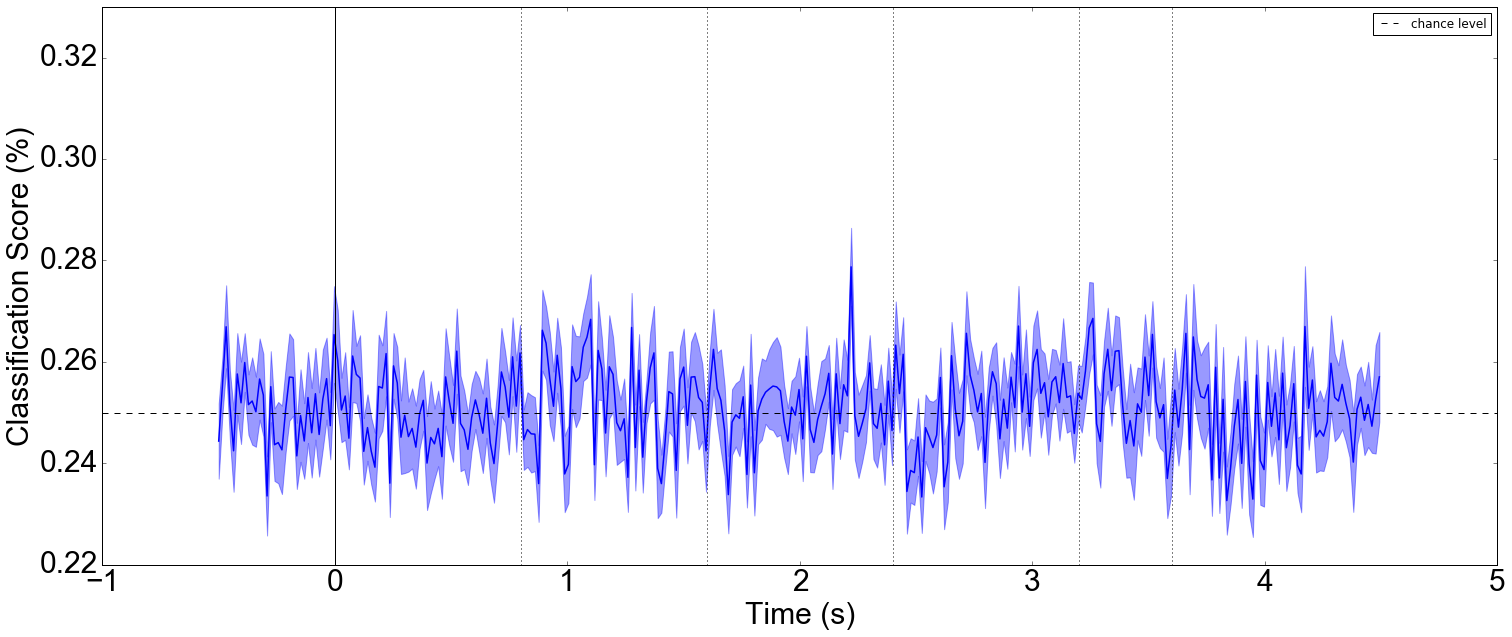

In [10]:
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)

sem_limits_preRes = (diag_preRes - diag_preRes_sem, diag_preRes + diag_preRes_sem)

plt.plot(epochs_times,diag_preRes, linewidth=1.5)
plt.fill_between(epochs_times, sem_limits_preRes[0], sem_limits_preRes[1], color='b', alpha=0.4)


#axes.set_xlim([xmin,xmax])
axes = plt.gca()
axes.set_ylim([.22,.33])

# Font
axis_font = {'fontname':'Arial', 'size':'30'}
title_font = {'fontname':'Arial', 'size':'32'}

plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset

plt.axhline(0.25, color = 'k', ls = '--', label = "chance level") #mark chance level
plt.legend(loc = 'upper right')

plt.xlabel('Time (s)', **axis_font)
plt.ylabel('Classification Score (%)', **axis_font)
#plt.title('Decoding addition vs. subtraction', **title_font)

rcParams['figure.figsize'] = 25,10

plt.show()

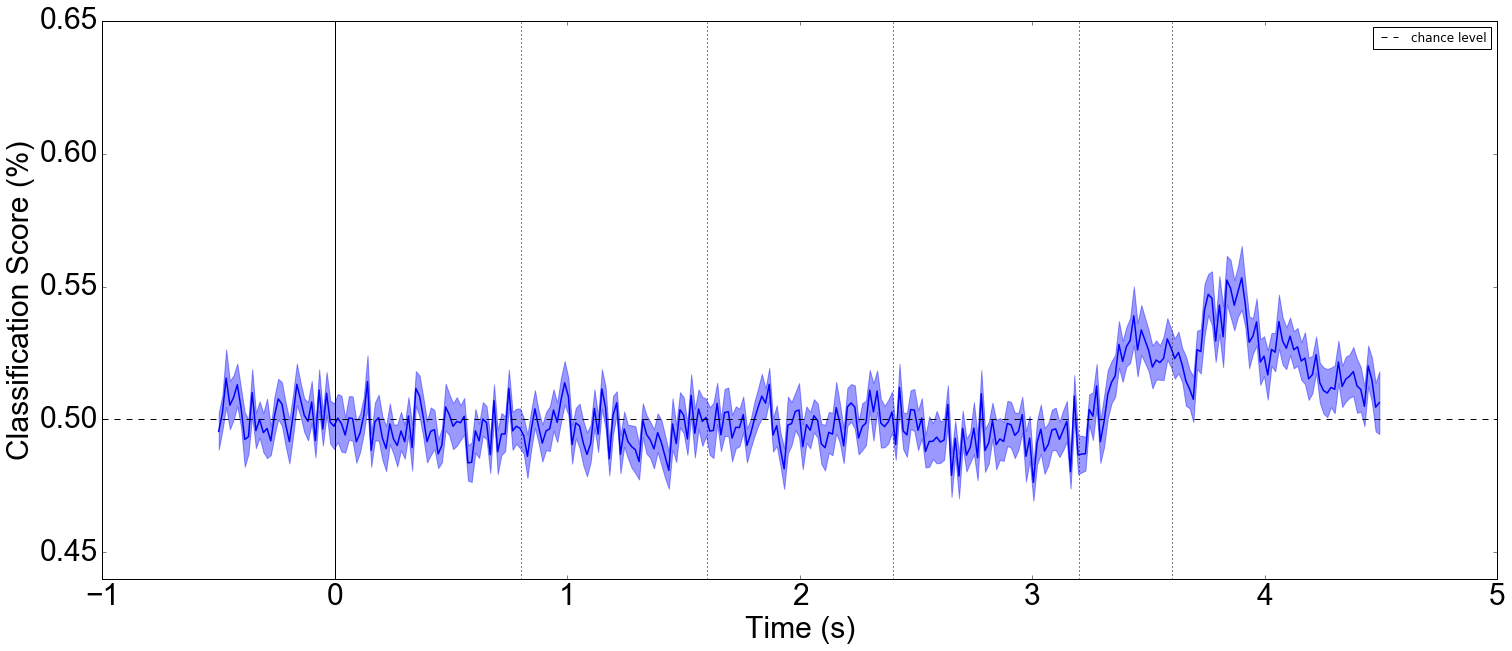

In [94]:
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)

sem_limits_corInc = (diag_corInc - diag_corInc_sem, diag_corInc + diag_corInc_sem)

plt.plot(epochs_times,diag_corInc, linewidth=1.5)
plt.fill_between(epochs_times, sem_limits_corInc[0], sem_limits_corInc[1], color='b', alpha=0.4)


#axes.set_xlim([xmin,xmax])
axes = plt.gca()
axes.set_ylim([.44,.65])

# Font
axis_font = {'fontname':'Arial', 'size':'30'}
title_font = {'fontname':'Arial', 'size':'32'}

plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset

plt.axhline(0.50, color = 'k', ls = '--', label = "chance level") #mark chance level
plt.legend(loc = 'upper right')

plt.xlabel('Time (s)', **axis_font)
plt.ylabel('Classification Score (%)', **axis_font)
#plt.title('Decoding addition vs. subtraction', **title_font)

rcParams['figure.figsize'] = 25,10

plt.show()

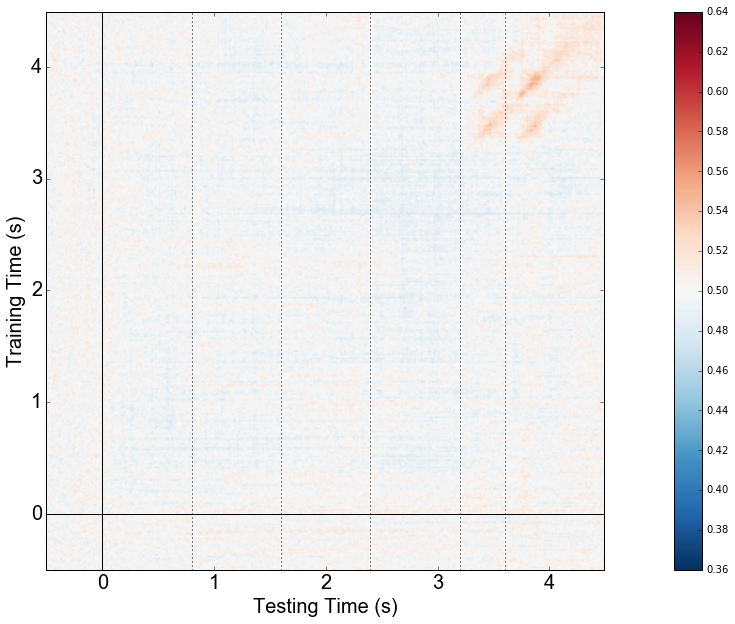

In [95]:
# Plot GAT
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(20)
    
imgplot = plt.imshow(group_scores_corInc, vmin=0.36, vmax=0.64, origin = 'lower', extent = [epochs_times[0], epochs_times[len(epochs_times)-1], 
                                                     epochs_times[0], epochs_times[len(epochs_times)-1]]) #flip the matrix around
imgplot.set_cmap('RdBu_r')

# Font
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'18'}


plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset
plt.axhline(0, color = 'k') #mark stimulus onset


#plt.colorbar()
plt.xlabel('Testing Time (s)', **axis_font)
plt.ylabel('Training Time (s)', **axis_font)
#plt.title('Decoding Generalization across time', **title_font)

rcParams['figure.figsize'] = 10,10

v = np.linspace(0.36, .64, 15, endpoint=True)
x = plt.colorbar(ticks=v)
#print x

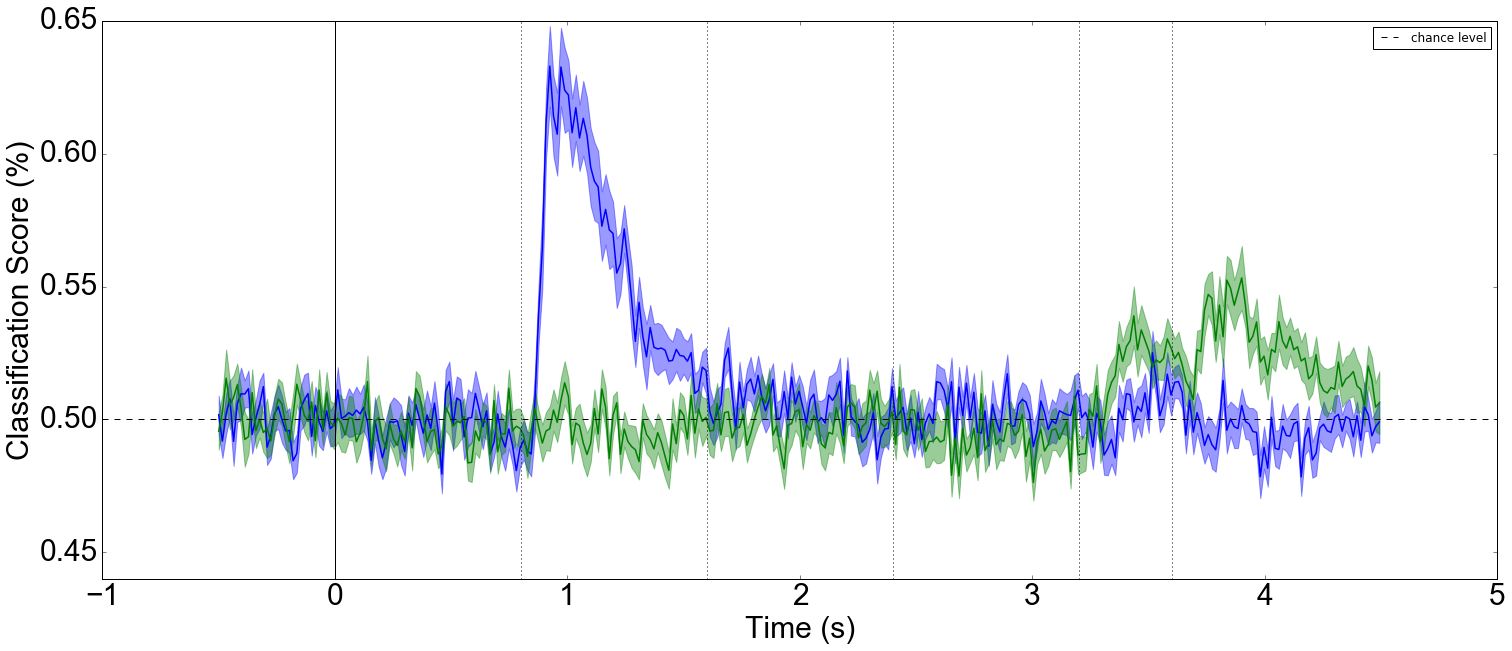

In [99]:
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)

sem_limits_addsub = (diag_addsub - diag_addsub_sem, diag_addsub + diag_addsub_sem)
sem_limits_corInc = (diag_corInc - diag_corInc_sem, diag_corInc + diag_corInc_sem)


plt.plot(epochs_times,diag_addsub,epochs_times,diag_corInc, linewidth=1.5)
plt.fill_between(epochs_times, sem_limits_addsub[0], sem_limits_addsub[1], color='b', alpha=0.4)
plt.fill_between(epochs_times, sem_limits_corInc[0], sem_limits_corInc[1], color='g', alpha=0.4)


#axes.set_xlim([xmin,xmax])
axes = plt.gca()
axes.set_ylim([.44,.65])

# Font
axis_font = {'fontname':'Arial', 'size':'30'}
title_font = {'fontname':'Arial', 'size':'32'}

plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset

plt.axhline(0.5, color = 'k', ls = '--', label = "chance level") #mark chance level
plt.legend(loc = 'upper right')

plt.xlabel('Time (s)', **axis_font)
plt.ylabel('Classification Score (%)', **axis_font)
#plt.title('Decoding operand_1 and operand_2', **title_font)

rcParams['figure.figsize'] = 25,10

plt.show()

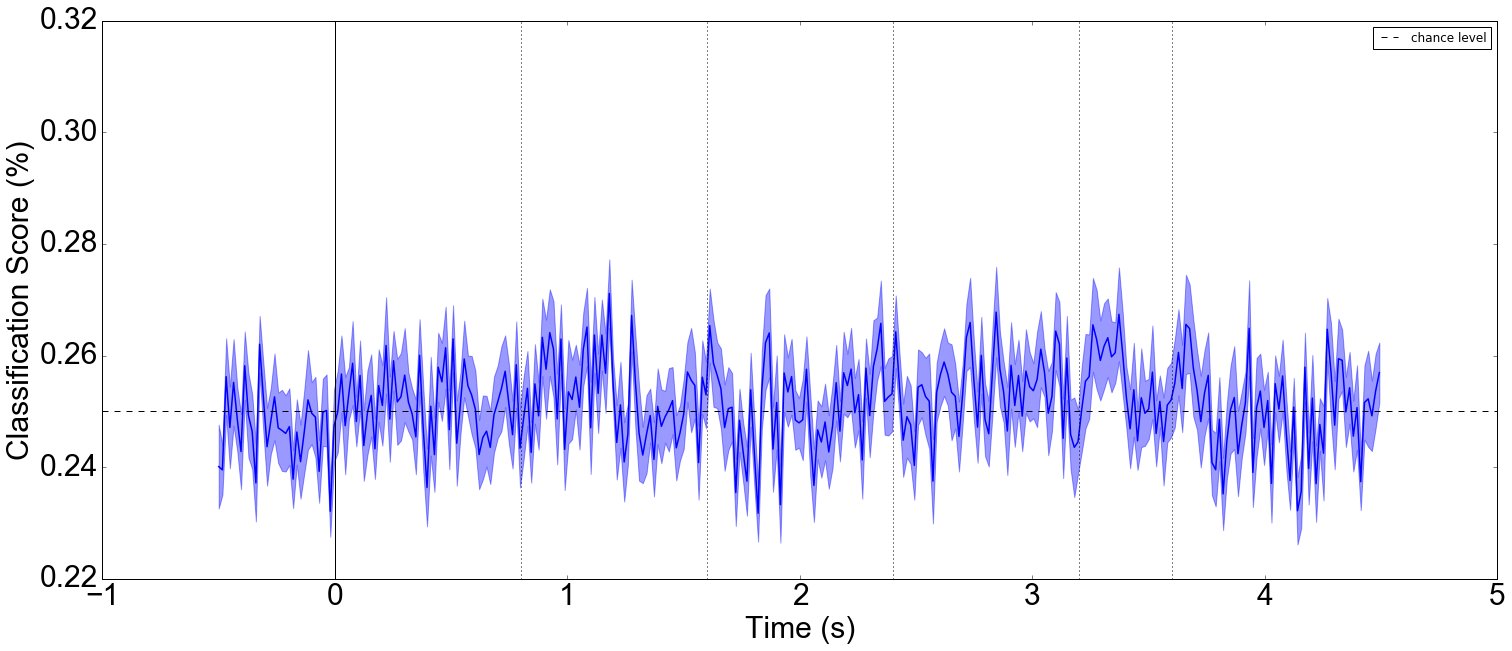

In [104]:
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)

sem_limits_preRes = (diag_preRes - diag_preRes_sem, diag_preRes + diag_preRes_sem)

plt.plot(epochs_times,diag_preRes, linewidth=1.5)
plt.fill_between(epochs_times, sem_limits_preRes[0], sem_limits_preRes[1], color='b', alpha=0.4)


#axes.set_xlim([xmin,xmax])
axes = plt.gca()
axes.set_ylim([.22,.32])

# Font
axis_font = {'fontname':'Arial', 'size':'30'}
title_font = {'fontname':'Arial', 'size':'32'}

plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset

plt.axhline(0.25, color = 'k', ls = '--', label = "chance level") #mark chance level
plt.legend(loc = 'upper right')

plt.xlabel('Time (s)', **axis_font)
plt.ylabel('Classification Score (%)', **axis_font)
#plt.title('Decoding addition vs. subtraction', **title_font)

rcParams['figure.figsize'] = 25,10

plt.show()

In [100]:
train_times = np.load(result_path + 'ResInc_train_times.npy')
test_times = np.load(result_path + 'ResInc_train_times.npy')

scores_op1 = np.load(result_path + 'Classification_ _Trainset_presResInc_TestsetpresResInCor.npy')
group_scores_op1 = np.mean(scores_op1, 0)
sem_group_scores_op1 = stats.sem(scores_op1, 0)
diag_op1 = group_scores_op1.diagonal()
diag_op1_sem = sem_group_scores_op1.diagonal()

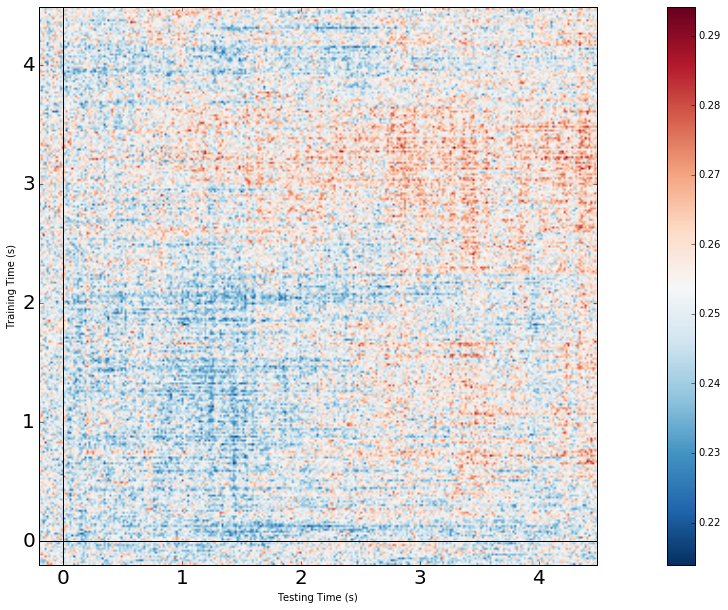

In [101]:
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(20)

# Plot GAT
imgplot = plt.imshow(group_scores_op1, origin = 'lower', extent = [test_times[0], test_times[len(test_times)-1], 
                                                     train_times[0], train_times[len(train_times)-1]]) #flip the matrix around

imgplot.set_cmap('RdBu_r')



plt.axvline(0, color = 'k') #mark stimulus onset
plt.axhline(0, color = 'k') #mark stimulus onset
plt.colorbar()
plt.xlabel('Testing Time (s)')
plt.ylabel('Training Time (s)')



rcParams['figure.figsize'] = 25,10

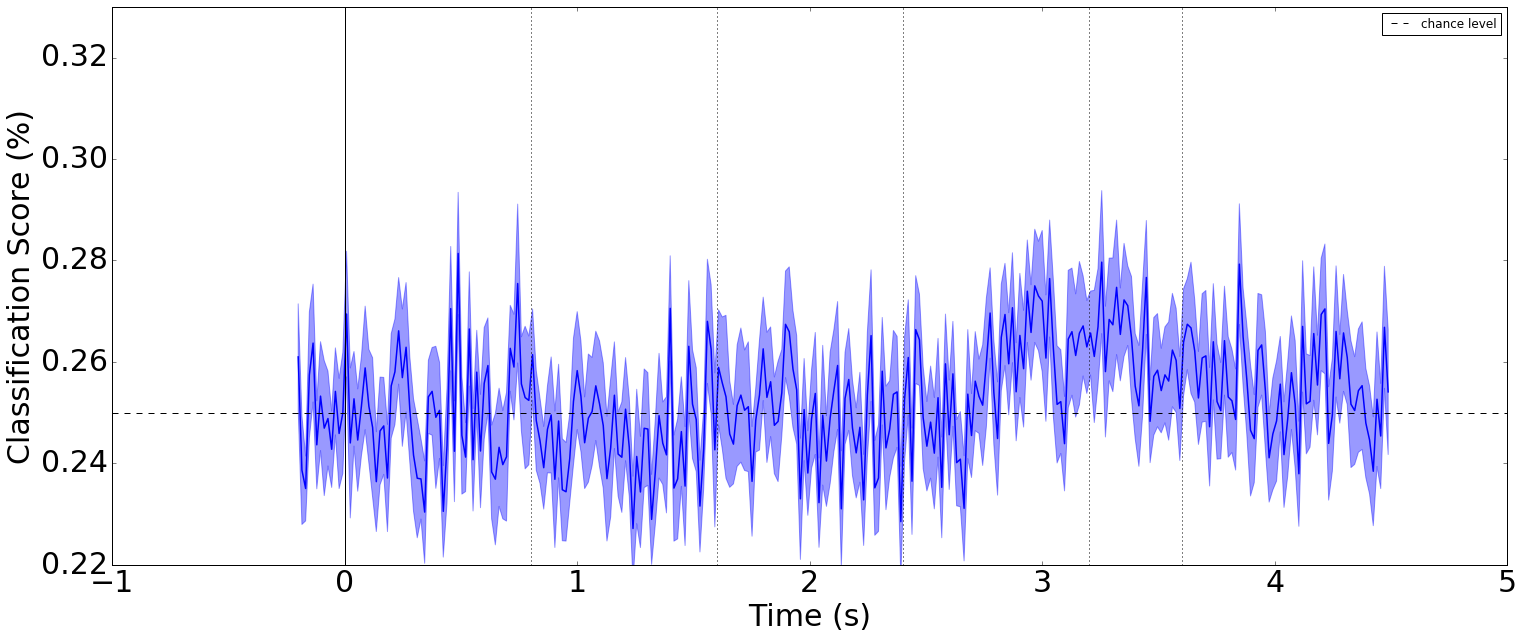

In [102]:
#plt.style.use('ggplot')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)

sem_limits_op1 = (diag_op1 - diag_op1_sem, diag_op1 + diag_op1_sem)


plt.plot(train_times,diag_op1, linewidth=1.5)


plt.fill_between(train_times, sem_limits_op1[0], sem_limits_op1[1], color='b', alpha=0.4)


#axes.set_xlim([xmin,xmax])
axes = plt.gca()
axes.set_ylim([.22,.33])

# Font
axis_font = {'fontname':'Arial', 'size':'30'}
title_font = {'fontname':'Arial', 'size':'32'}

plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(1.6, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(2.4, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.2, color = 'k', ls = ':') #mark stimulus onset
plt.axvline(3.6, color = 'k', ls = ':') #mark stimulus onset

plt.axhline(0.25, color = 'k', ls = '--', label = "chance level") #mark chance level
plt.legend(loc = 'upper right')

plt.xlabel('Time (s)', **axis_font)
plt.ylabel('Classification Score (%)', **axis_font)
#plt.title('Decoding operand_1 and operand_2', **title_font)

rcParams['figure.figsize'] = 25,10

plt.show()